## Cereal Data Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import shap
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
sns.set_palette("muted")
pd.options.display.float_format = "{:,.2f}".format

In [2]:
df = pd.read_csv("dataset/cereal.csv")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.00,5.00,6,280,25,3,1.00,0.33,68.40
1,100% Natural Bran,Q,C,120,3,5,15,2.00,8.00,8,135,0,3,1.00,1.00,33.98
2,All-Bran,K,C,70,4,1,260,9.00,7.00,5,320,25,3,1.00,0.33,59.43
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.00,8.00,0,330,25,3,1.00,0.50,93.70
4,Almond Delight,R,C,110,2,2,200,1.00,14.00,8,-1,25,3,1.00,0.75,34.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.00,21.00,3,60,25,3,1.00,0.75,39.11
73,Trix,G,C,110,1,1,140,0.00,13.00,12,25,25,2,1.00,1.00,27.75
74,Wheat Chex,R,C,100,3,1,230,3.00,17.00,3,115,25,1,1.00,0.67,49.79
75,Wheaties,G,C,100,3,1,200,3.00,17.00,3,110,25,1,1.00,1.00,51.59


In [3]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,106.88,2.55,1.01,159.68,2.15,14.60,6.92,96.08,28.25,2.21,1.03,0.82,42.67
std,19.48,1.09,1.01,83.83,2.38,4.28,4.44,71.29,22.34,0.83,0.15,0.23,14.05
min,50.00,1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,0.00,1.00,0.50,0.25,18.04
25%,100.00,2.00,0.00,130.00,1.00,12.00,3.00,40.00,25.00,1.00,1.00,0.67,33.17
50%,110.00,3.00,1.00,180.00,2.00,14.00,7.00,90.00,25.00,2.00,1.00,0.75,40.40
75%,110.00,3.00,2.00,210.00,3.00,17.00,11.00,120.00,25.00,3.00,1.00,1.00,50.83
max,160.00,6.00,5.00,320.00,14.00,23.00,15.00,330.00,100.00,3.00,1.50,1.50,93.70


The average calorie content is 106.88

In [4]:
correlation = df.corr(numeric_only=True)
correlation

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.00,0.02,0.50,0.30,-0.29,0.25,0.56,-0.07,0.27,0.10,0.70,0.09,-0.69
protein,0.02,1.00,0.21,-0.05,0.50,-0.13,-0.33,0.55,0.01,0.13,0.22,-0.24,0.47
fat,0.50,0.21,1.00,-0.01,0.02,-0.32,0.27,0.19,-0.03,0.26,0.21,-0.18,-0.41
sodium,0.30,-0.05,-0.01,1.00,-0.07,0.36,0.10,-0.03,0.36,-0.07,0.31,0.12,-0.40
fiber,-0.29,0.50,0.02,-0.07,1.00,-0.36,-0.14,0.90,-0.03,0.30,0.25,-0.51,0.58
carbo,0.25,-0.13,-0.32,0.36,-0.36,1.00,-0.33,-0.35,0.26,-0.10,0.14,0.36,0.05
sugars,0.56,-0.33,0.27,0.10,-0.14,-0.33,1.00,0.02,0.13,0.10,0.45,-0.03,-0.76
potass,-0.07,0.55,0.19,-0.03,0.90,-0.35,0.02,1.00,0.02,0.36,0.42,-0.50,0.38
vitamins,0.27,0.01,-0.03,0.36,-0.03,0.26,0.13,0.02,1.00,0.30,0.32,0.13,-0.24
shelf,0.10,0.13,0.26,-0.07,0.30,-0.10,0.10,0.36,0.30,1.00,0.19,-0.34,0.03


There are strong negative correlation between sugar content and rating, it means that as the sugar content of a cereal increases, its rating tends to decrease.

<AxesSubplot: >

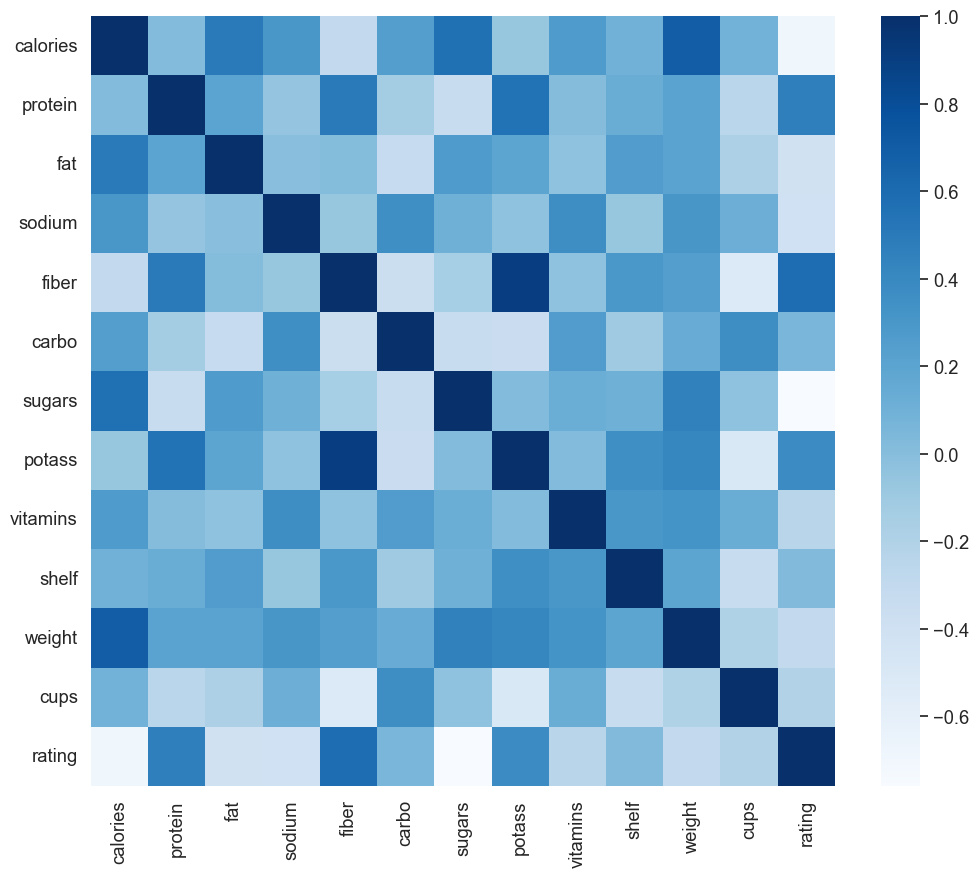

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation, cmap="Blues")

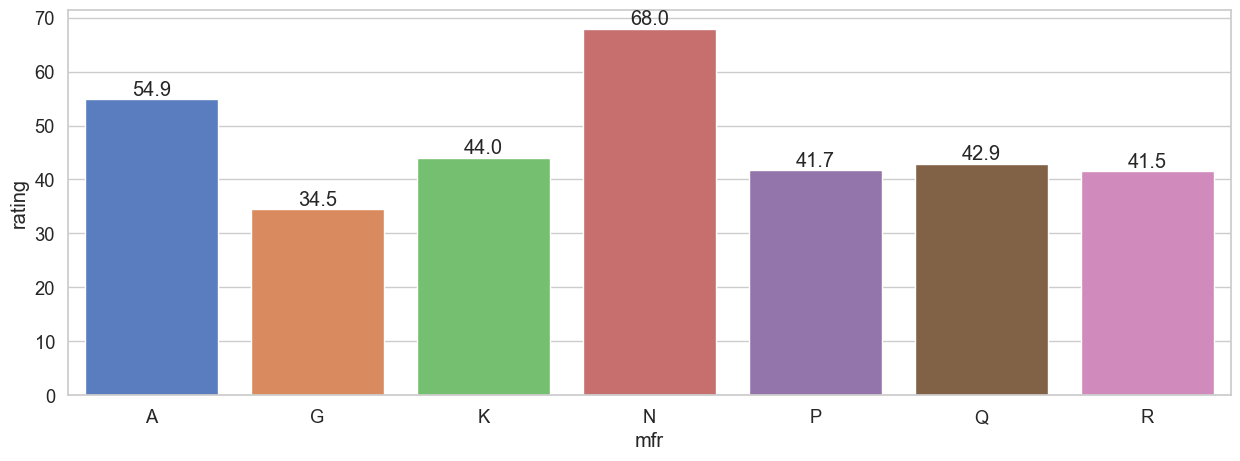

In [6]:
rating_by_mfr = df.groupby('mfr')['rating'].mean().reset_index()

plt.figure(figsize=(15,5))
ax = sns.barplot(x="mfr", y="rating", data=rating_by_mfr)

for i, rating in enumerate(rating_by_mfr['rating']):
    ax.annotate('{:.1f}'.format(rating), (i, rating), ha='center', va='bottom')

plt.show()

In [7]:
df.loc[df["rating"].idxmax()]

name        All-Bran with Extra Fiber
mfr                                 K
type                                C
calories                           50
protein                             4
fat                                 0
sodium                            140
fiber                           14.00
carbo                            8.00
sugars                              0
potass                            330
vitamins                           25
shelf                               3
weight                           1.00
cups                             0.50
rating                          93.70
Name: 3, dtype: object

The cereal manufacturer "K" produces the highest-rated cereal, All-Bran with Extra Fiber, with a rating of 93.7. However, the highest rating cereals on average is cereals produced by "N" with a rating of 68.0.

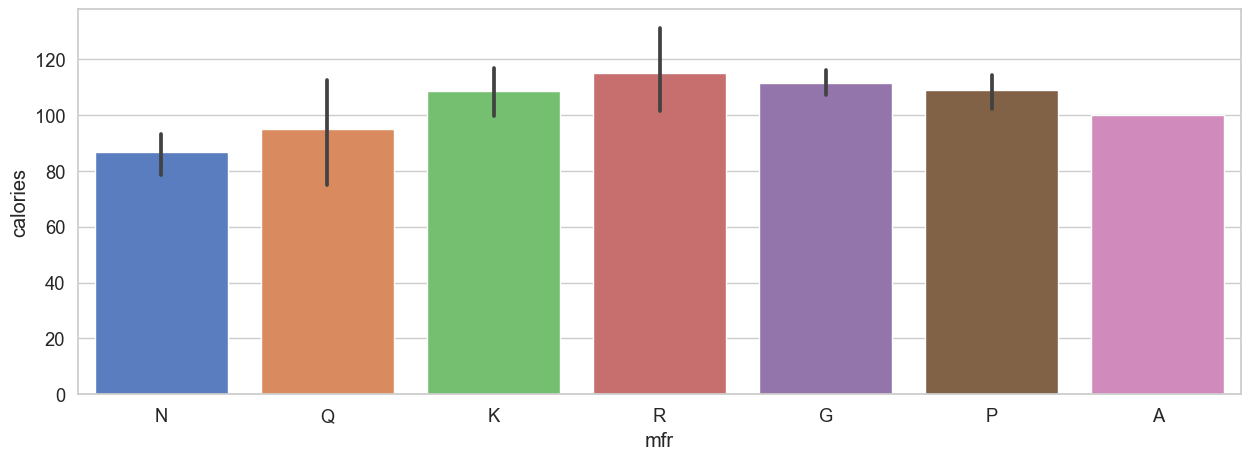

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x="mfr", y="calories", data=df);

<AxesSubplot: xlabel='mfr', ylabel='count'>

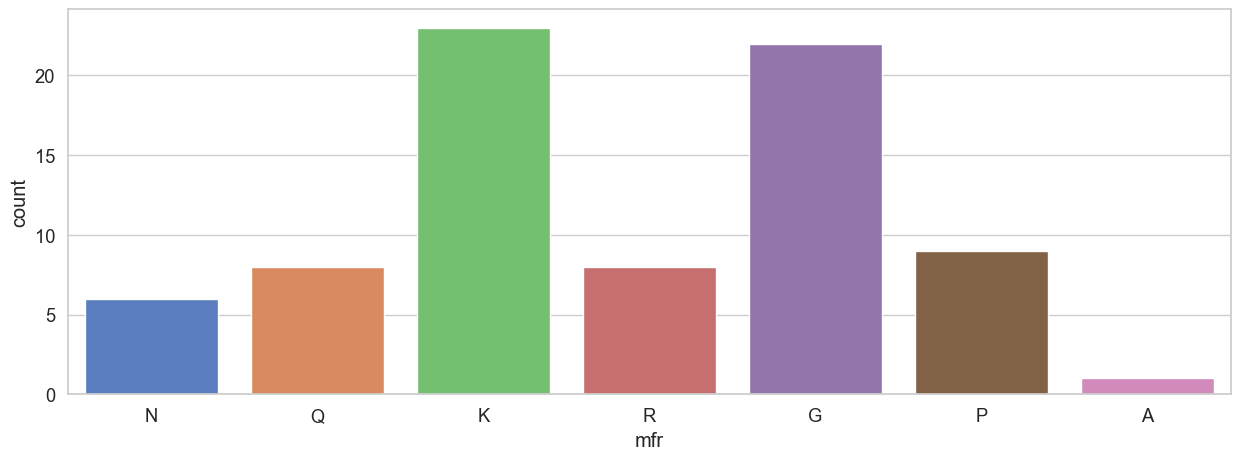

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x='mfr', data=df)

<AxesSubplot: xlabel='rating', ylabel='calories'>

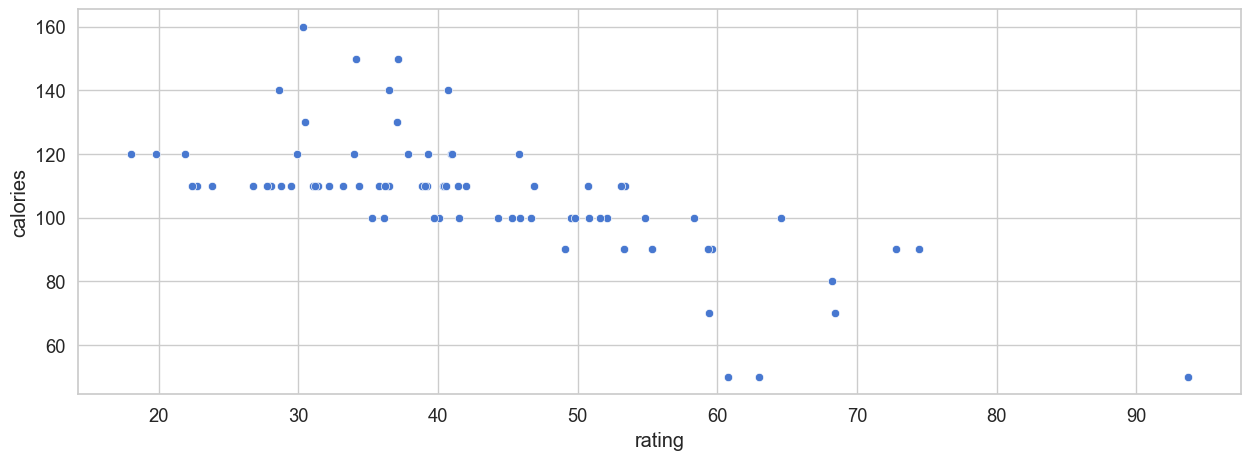

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='rating', y='calories', data=df)

Check missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


There are no missing values in this dataset

In [12]:
X = df.drop(["name", "rating"], axis=1)
y = pd.DataFrame(df["rating"]).copy()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
feature_names = X_train.columns

In [15]:
encoder = LabelEncoder()
cols_to_encode = ["mfr", "type"]

for col in cols_to_encode:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.fit_transform(X_test[col])

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model Training

Train a linear regression model

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(f"{X.columns[i]} = {regressor.coef_[0][i]:.3f}")

Model coefficients:

mfr = 0.000
type = -0.000
calories = -4.418
protein = 3.623
fat = -1.691
sodium = -4.661
fiber = 8.014
carbo = 4.821
sugars = -3.216
potass = -2.351
vitamins = -1.184
shelf = -0.000
weight = 0.000
cups = 0.000


In [19]:
explainer = shap.Explainer(regressor, X_train, feature_names=feature_names)
shap_values = explainer(X_train)

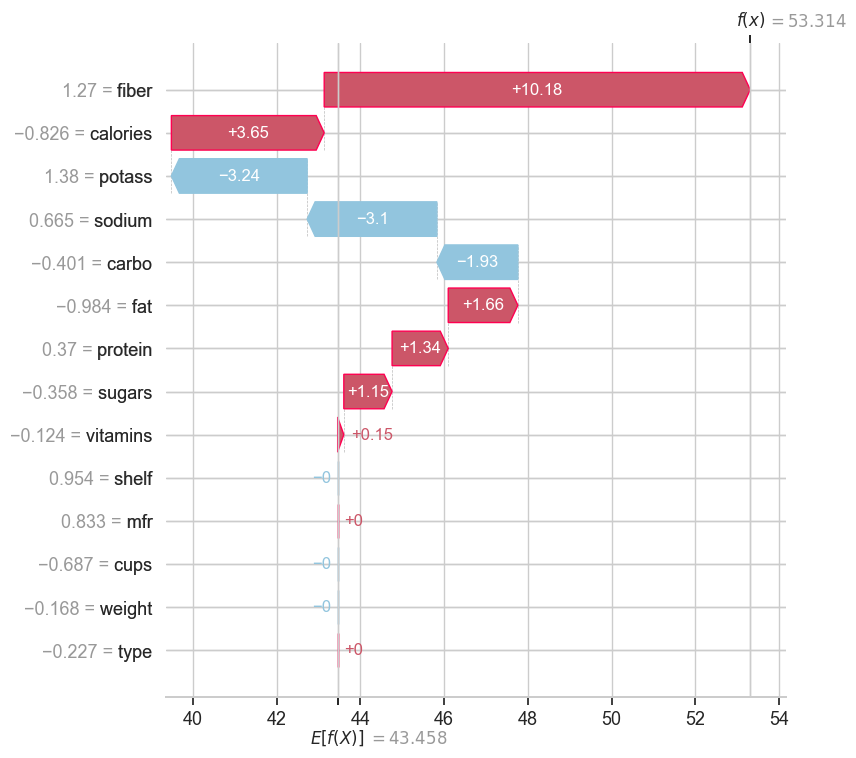

In [20]:
import matplotlib
import matplotlib.pyplot as plt

# Default SHAP colors
default_pos_color = "#ff0051"
default_neg_color = "#008bfb"
# Custom colors
positive_color = "#cc5668"
negative_color = "#92c5de"

shap.plots.waterfall(shap_values[0], show = False, max_display=15)
# Change the colormap of the artists
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if (isinstance(fcc, matplotlib.patches.FancyArrow)):
            if (matplotlib.colors.to_hex(fcc.get_facecolor()) == default_pos_color):
                fcc.set_facecolor(positive_color)
            elif (matplotlib.colors.to_hex(fcc.get_facecolor()) == default_neg_color):
                fcc.set_color(negative_color)
        elif (isinstance(fcc, plt.Text)):
            if (matplotlib.colors.to_hex(fcc.get_color()) == default_pos_color):
                fcc.set_color(positive_color)
            elif (matplotlib.colors.to_hex(fcc.get_color()) == default_neg_color):
                fcc.set_color(negative_color)
plt.show()

In [21]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [22]:
print(f"R2 Training = {r2_score(y_train, y_train_pred):.2f}")
print(f"R2 Testing = {r2_score(y_test, y_test_pred):.2f}")
print(f"RMSE Training = {mean_squared_error(y_train, y_train_pred, squared=False):.2f}")
print(f"RMSE Testing = {mean_squared_error(y_test, y_test_pred, squared=False):.2f}")

R2 Training = 1.00
R2 Testing = 0.92
RMSE Training = 0.00
RMSE Testing = 4.07
